## Project Objective
The objective of this project is to analyze social media usage patterns across different demographics, platforms, and user behaviors. The analysis utilizes SQL queries to derive insights on how factors like age, gender, income, addiction levels, and device type influence social media engagement and user satisfaction.

##### Import neccessary libraries

In [1]:
import pandas as pd

In [9]:
import sqlite3

In [11]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

##### Set up visualization style

In [15]:
sns.set(style="whitegrid")

##### Load the dataset into a pandas DataFrame

In [17]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL\archive (8)\Time-Wasters on Social Media.csv")

##### sqlite3: This library is used to interact with an SQLite database in Python.

##### pandas: Used for data manipulation and analysis.

##### matplotlib.pyplot and seaborn: Libraries used for creating visualizations.

####  Connect to an SQLite database

In [30]:
conn = sqlite3.connect('social_media_data.db')

#### Load DataFrame into the SQLite database

In [33]:
data.to_sql('social_media_data', conn, if_exists='replace', index=False)

1000

##### Note: The dataset is loaded into a pandas DataFrame and then stored in an SQLite database. This allows SQL queries to be executed on the data.

### SQL Analysis

### 1. User Distribution by Age Group

##### SQL Query to Group Users by Age

In [42]:
age_group_query = """
SELECT
  CASE 
    WHEN Age BETWEEN 13 AND 18 THEN '13-18'
    WHEN Age BETWEEN 19 AND 25 THEN '19-25'
    WHEN Age BETWEEN 26 AND 35 THEN '26-35'
    WHEN Age BETWEEN 36 AND 45 THEN '36-45'
    WHEN Age > 45 THEN '45+'
  END AS age_group,
  COUNT(UserID) AS user_count
FROM
  social_media_data
GROUP BY
  age_group
ORDER BY
  age_group;
"""

In [44]:
age_group_data = pd.read_sql_query(age_group_query, conn)

#### Display the result

In [47]:
age_group_data

,age_group,user_count
0,13-18,25
1,19-25,152
2,26-35,192
3,36-45,231
4,45+,400


##### 1.1 Visualization: Bar Plot of User Distribution by Age Group

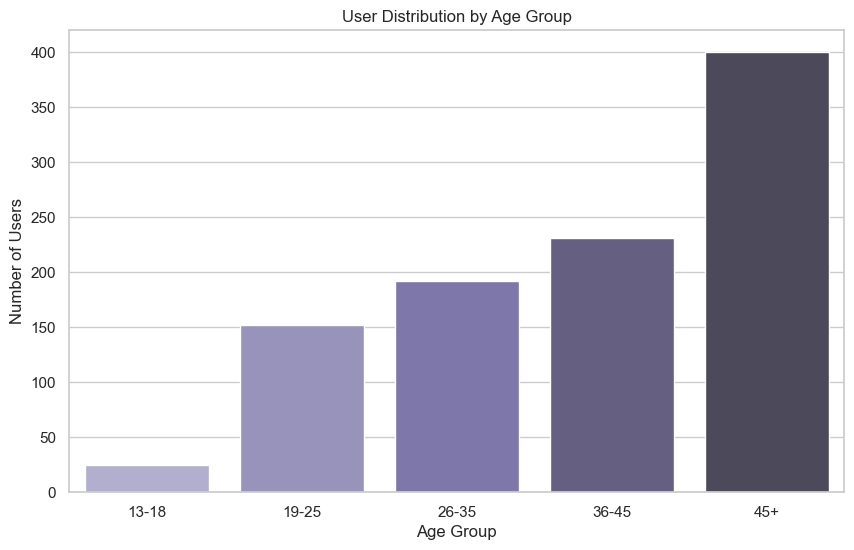

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='user_count', hue='age_group', data=age_group_data, palette='Purples_d', legend=False)
plt.title('User Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()


### 2. Gender Distribution by Platform

##### SQL Query to Analyze Gender Distribution by Platform

In [65]:
gender_platform_query = """
SELECT
  Platform,
  Gender,
  COUNT(UserID) AS user_count
FROM
  social_media_data
GROUP BY
  Platform, Gender
ORDER BY
  Platform, user_count DESC;
"""

In [70]:
gender_platform_data = pd.read_sql_query(gender_platform_query, conn)

##### Display the result

In [72]:
gender_platform_data

,Platform,Gender,user_count
0,Facebook,Male,115
1,Facebook,Female,72
2,Facebook,Other,34
3,Instagram,Male,131
4,Instagram,Female,92
5,Instagram,Other,33
6,TikTok,Male,139
7,TikTok,Female,83
8,TikTok,Other,51
9,YouTube,Male,129


#### 2.1 Visualization: Stacked Bar Plot of Gender Distribution by Platform

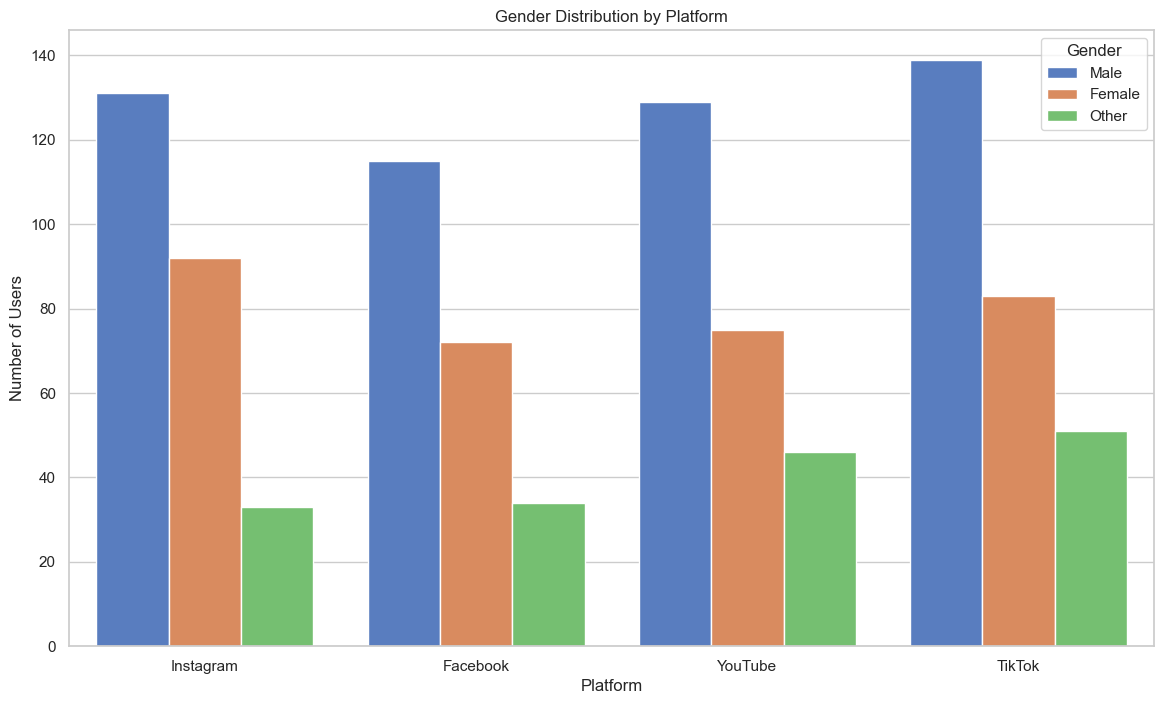

In [80]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Platform', hue='Gender', data=data, palette='muted')
plt.title('Gender Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.show()

### 3. Average Time Spent on Social Media by Age Group

##### SQL Query to Calculate Average Time Spent by Age Group

In [84]:
avg_time_query = """
SELECT
  CASE 
    WHEN Age BETWEEN 13 AND 18 THEN '13-18'
    WHEN Age BETWEEN 19 AND 25 THEN '19-25'
    WHEN Age BETWEEN 26 AND 35 THEN '26-35'
    WHEN Age BETWEEN 36 AND 45 THEN '36-45'
    WHEN Age > 45 THEN '45+'
  END AS age_group,
  AVG("Total Time Spent") AS avg_time_spent
FROM
  social_media_data
GROUP BY
  age_group
ORDER BY
  age_group;
"""

In [86]:
avg_time_data = pd.read_sql_query(avg_time_query, conn)

##### Display Result

In [88]:
avg_time_data

,age_group,avg_time_spent
0,13-18,145.600000
1,19-25,160.710526
2,26-35,145.302083
3,36-45,150.450216
4,45+,151.715000


##### 3.1 Visualization: Line Plot of Average Time Spent by Age Group

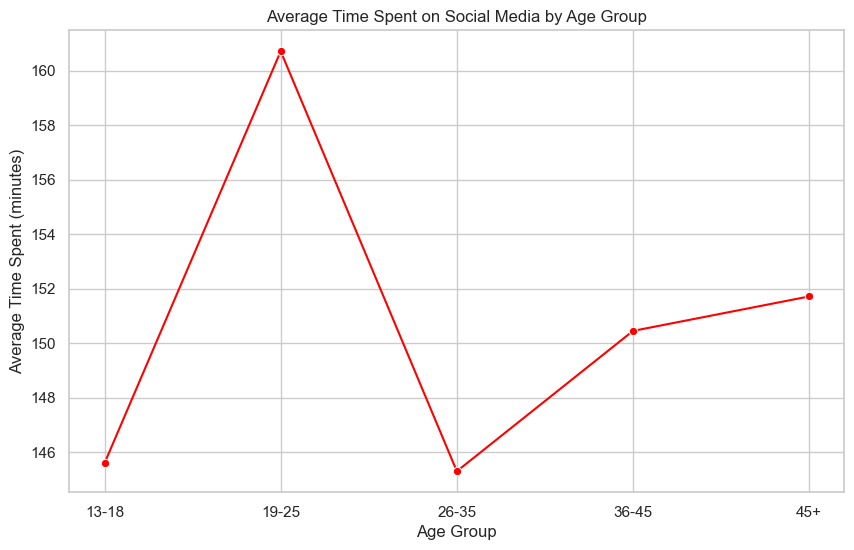

In [94]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='avg_time_spent', data=avg_time_data, marker='o', color='red')
plt.title('Average Time Spent on Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Time Spent (minutes)')
plt.show()

### 4. Impact of Income on Social Media Usage

##### SQL Query to Analyze the Impact of Income on Time Spent

In [100]:
income_time_query = """
SELECT
  CASE 
    WHEN Income < 20000 THEN 'Under 20k'
    WHEN Income BETWEEN 20000 AND 50000 THEN '20k-50k'
    WHEN Income BETWEEN 50001 AND 100000 THEN '50k-100k'
    WHEN Income > 100000 THEN 'Above 100k'
  END AS income_group,
  AVG("Total Time Spent") AS avg_time_spent
FROM
  social_media_data
GROUP BY
  income_group
ORDER BY
  income_group;
"""

In [102]:
income_time_data = pd.read_sql_query(income_time_query, conn)

##### Display the result

In [105]:
income_time_data

,income_group,avg_time_spent
0,20k-50k,153.356608
1,50k-100k,150.100167


#### 4.1 Visualization: Bar Plot of Average Time Spent by Income Group

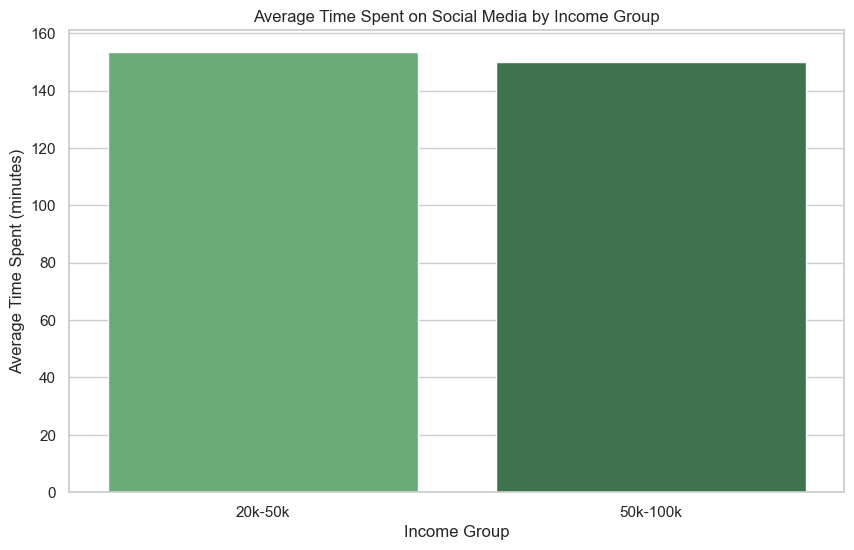

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income_group', y='avg_time_spent', data=income_time_data, hue='income_group', palette='Greens_d')
plt.title('Average Time Spent on Social Media by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Time Spent (minutes)')
plt.show()

### 5. Average Time Spent on Videos by Addiction Level

##### SQL Query to Analyze Average time spent on videos by addiction level

In [168]:
avg_time_spent_query = """
SELECT
    [Addiction Level] AS AddictionLevel,
    AVG([Time Spent On Video]) AS AvgTimeSpent
FROM
    social_media_data
GROUP BY
    [Addiction Level]
ORDER BY
    [Addiction Level];
"""


##### Execute query and load into DataFrame

In [170]:
avg_time_spent_data = pd.read_sql_query(avg_time_spent_query, conn)

##### Display results

In [172]:
print(avg_time_spent_data)

   AddictionLevel  AvgTimeSpent
0               0     15.177778
1               1     13.533333
2               2     15.221774
3               3     14.861635
4               4     15.000000
5               5     15.144737
6               6     13.470588
7               7     15.272727


##### 5.1 Visualization: Line Plot

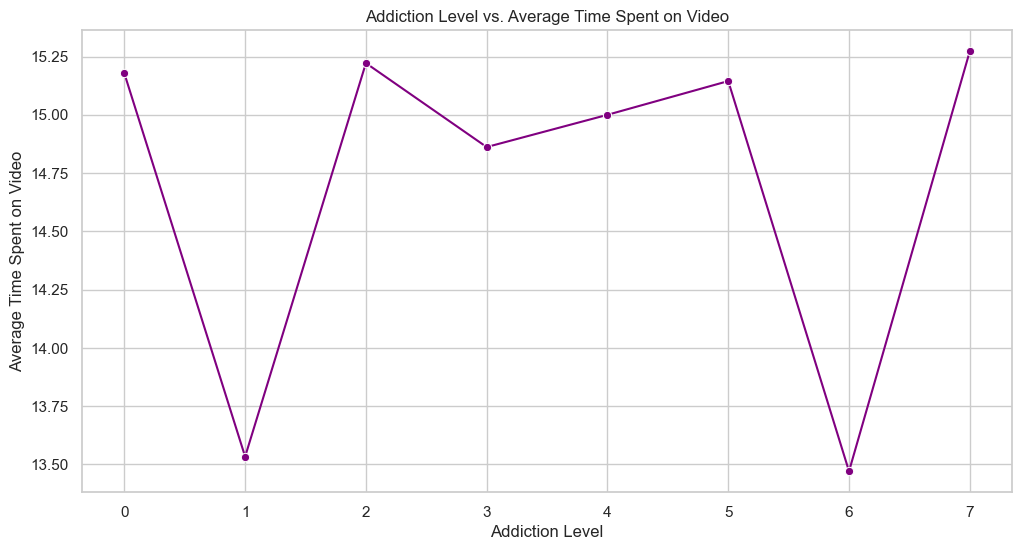

In [174]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='AddictionLevel',
    y='AvgTimeSpent',
    data=avg_time_spent_data,
    marker='o',
    color='purple'
)
plt.title('Addiction Level vs. Average Time Spent on Video')
plt.xlabel('Addiction Level')
plt.ylabel('Average Time Spent on Video')
plt.grid(True)
plt.show()

### 6.Average Productivity Loss by Addiction Level

##### SQL Query to Analyse Average productivity loss by addiction level

In [224]:
avg_productivity_loss_query = """
SELECT
    [Addiction Level] AS AddictionLevel,
    AVG([ProductivityLoss]) AS AvgProductivityLoss
FROM
    social_media_data
GROUP BY
    [Addiction Level]
ORDER BY
    [Addiction Level];
"""

##### Execute query and load into DataFrame

In [185]:
avg_productivity_loss_data = pd.read_sql_query(avg_productivity_loss_query, conn)

##### Display Result

In [187]:
avg_productivity_loss_data

,AddictionLevel,AvgProductivityLoss
0,0,8.205556
1,1,7.000000
2,2,6.008065
3,3,5.018868
4,4,4.000000
5,5,3.000000
6,6,2.000000
7,7,1.000000


##### 6.1 Visualization: Bar plot

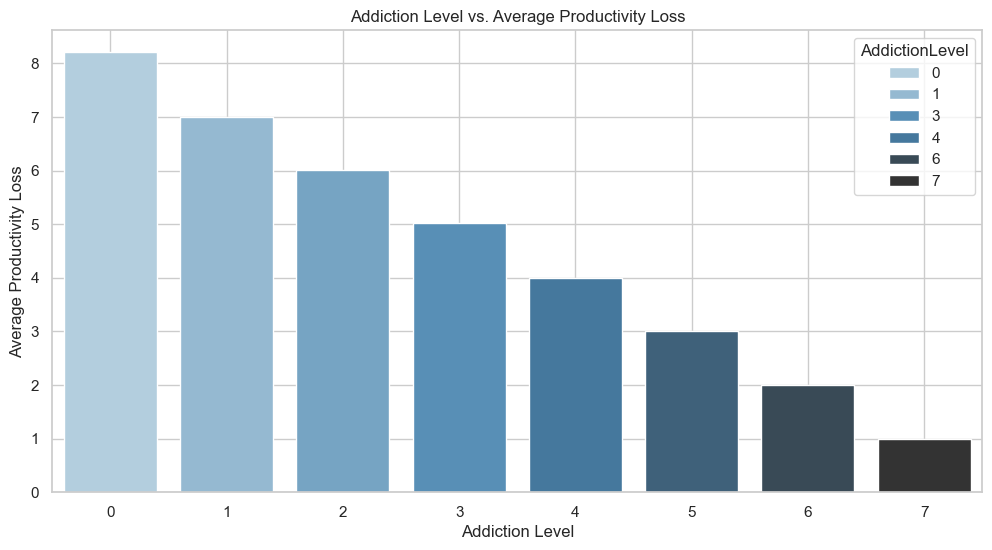

In [193]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='AddictionLevel',
    y='AvgProductivityLoss',
    hue ='AddictionLevel',
    data=avg_productivity_loss_data,
    palette='Blues_d'
)
plt.title('Addiction Level vs. Average Productivity Loss')
plt.xlabel('Addiction Level')
plt.ylabel('Average Productivity Loss')
plt.grid(True)
plt.show()

### 7. Average Satisfaction vs. Self Control

##### SQL query to Analyse Average Satisfaction VS Self Control

In [196]:
self_control_satisfaction_query = """
SELECT
    [Self Control],
    AVG(Satisfaction) AS avg_satisfaction
FROM
    social_media_data
GROUP BY
    [Self Control]
ORDER BY
    [Self Control];
"""

##### Execute query and load into DataFrame

In [198]:
self_control_satisfaction_data = pd.read_sql_query(self_control_satisfaction_query, conn)

##### Display Result

In [200]:
self_control_satisfaction_data 

,Self Control,avg_satisfaction
0,3,9.000000
1,4,8.000000
2,5,7.000000
3,6,6.000000
4,7,4.981132
5,8,3.991935
6,9,3.000000
7,10,1.794444


##### 7.1 Visualization : Line plot

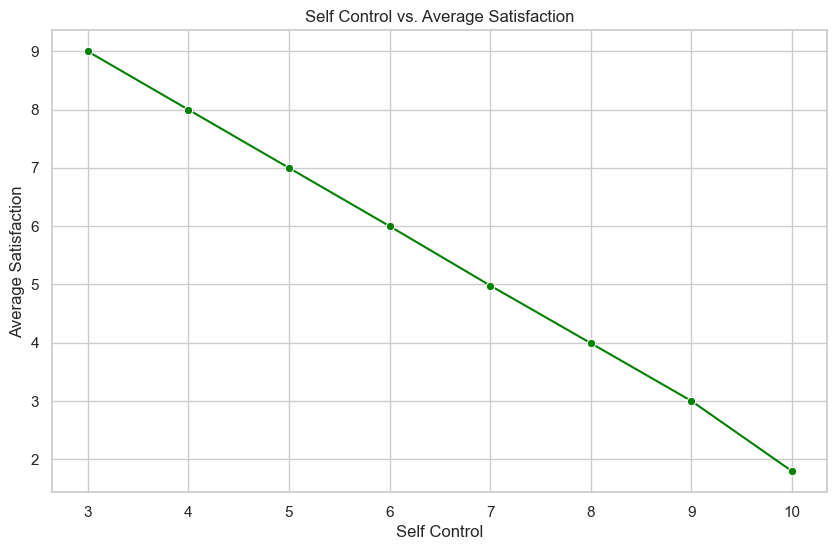

In [202]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Self Control', 
    y='avg_satisfaction', 
    data=self_control_satisfaction_data, 
    marker='o', 
    color='green'
)
plt.title('Self Control vs. Average Satisfaction')
plt.xlabel('Self Control')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.show()

### 8. Video Length and Engagement

##### SQL query to analyse video length and engagement

In [205]:
video_length_engagement_query = """
SELECT
    [Video Length],
    AVG(Engagement) AS avg_engagement
FROM
    social_media_data
GROUP BY
    [Video Length]
ORDER BY
    [Video Length];
"""

##### Execute query and load into DataFrame

In [207]:
video_length_engagement_data = pd.read_sql_query(video_length_engagement_query, conn)

##### Display Result

In [209]:
video_length_engagement_data 

,Video Length,avg_engagement
0,1,4177.419355
1,2,5830.714286
2,3,4536.233333
3,4,5744.193548
4,5,4866.647059
5,6,4720.375000
6,7,5147.531250
7,8,5023.577778
8,9,5079.218750
9,10,4031.354839


##### 8.1 Visualization: Scatterplot

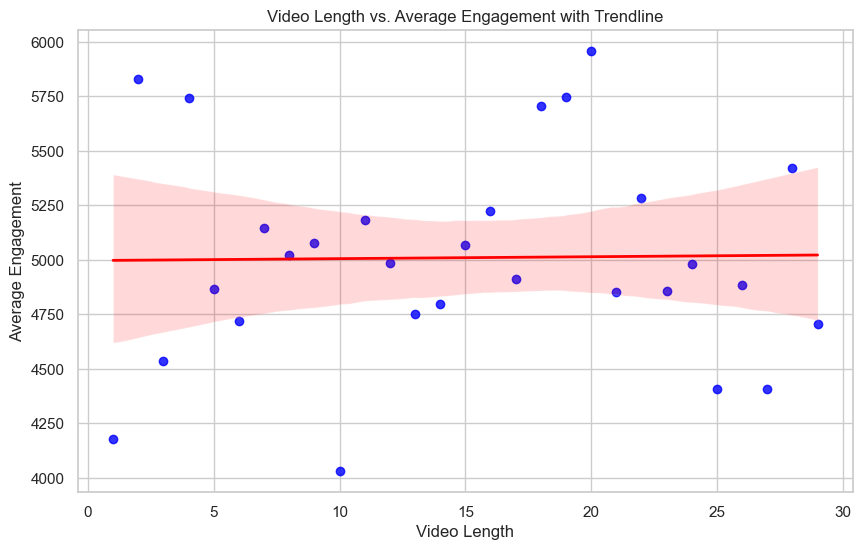

In [213]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Video Length', 
    y='avg_engagement', 
    data=video_length_engagement_data, 
    scatter_kws={'color': 'blue'},  # Color for the scatter points
    line_kws={'color': 'red', 'linewidth': 2}  # Color and style for the trendline
)
plt.title('Video Length vs. Average Engagement with Trendline')
plt.xlabel('Video Length')
plt.ylabel('Average Engagement')
plt.grid(True)
plt.show()

### 9. Effect of Device Type on Engagement

##### SQL query to get average engagement by device type

In [251]:
device_engagement_query = """
SELECT
    DeviceType,
    AVG(Engagement) AS avg_engagement
FROM
    social_media_data
GROUP BY
    DeviceType
ORDER BY
    avg_engagement DESC;
"""

##### Execute the query and load the results into a DataFrame

In [254]:
device_engagement_data = pd.read_sql_query(device_engagement_query, conn)

##### Display the results

In [257]:
device_engagement_data

,DeviceType,avg_engagement
0,Computer,5421.742424
1,Tablet,4993.823322
2,Smartphone,4902.969231


##### 9.1 Visualization: Barplot

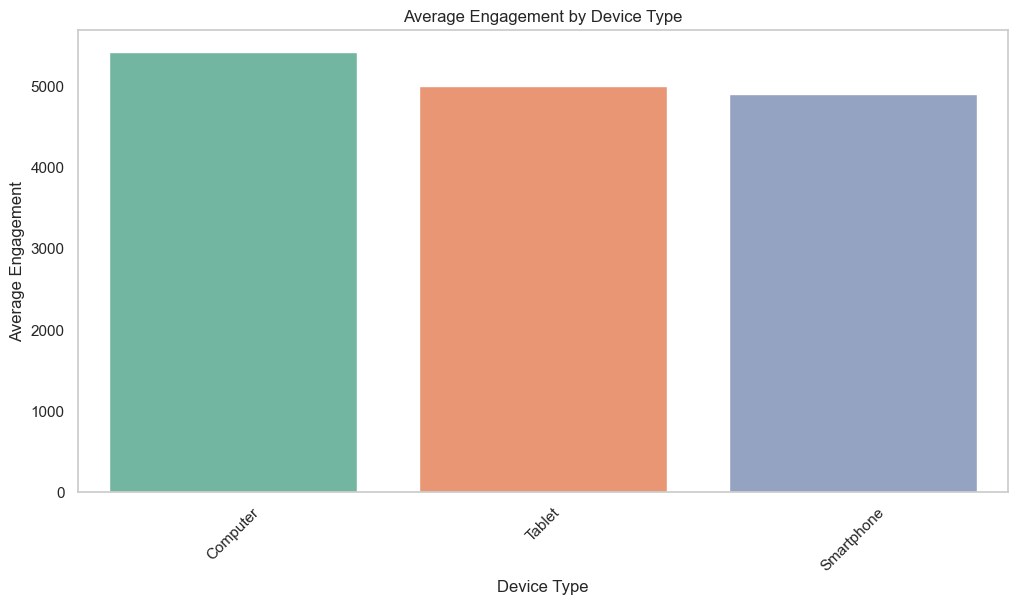

In [264]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='DeviceType',
    hue='DeviceType',
    y='avg_engagement', 
    data=device_engagement_data, 
    palette='Set2'
)
plt.title('Average Engagement by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 10 Frequency of Watch Reason by Connection Type

SQL Query for frequency of watch reason by connection type

In [328]:
watch_reason_query = """
SELECT 
    [Watch Reason] AS Watch_Reason, 
    [ConnectionType] AS Connection_Type, 
    COUNT(*) AS Frequency
FROM 
    social_media_data
GROUP BY 
    [Watch Reason], 
    [ConnectionType]
ORDER BY 
    Frequency DESC;
"""

##### Execute the query

In [330]:
watch_reason_data = pd.read_sql(watch_reason_query, conn)

##### Display the results

In [333]:
watch_reason_data.head()

,Watch_Reason,Connection_Type,Frequency
0,Habit,Mobile Data,237
1,Entertainment,Mobile Data,184
2,Boredom,Mobile Data,181
3,Habit,Wi-Fi,102
4,Boredom,Wi-Fi,96


### 10.1 Visualization: countplot

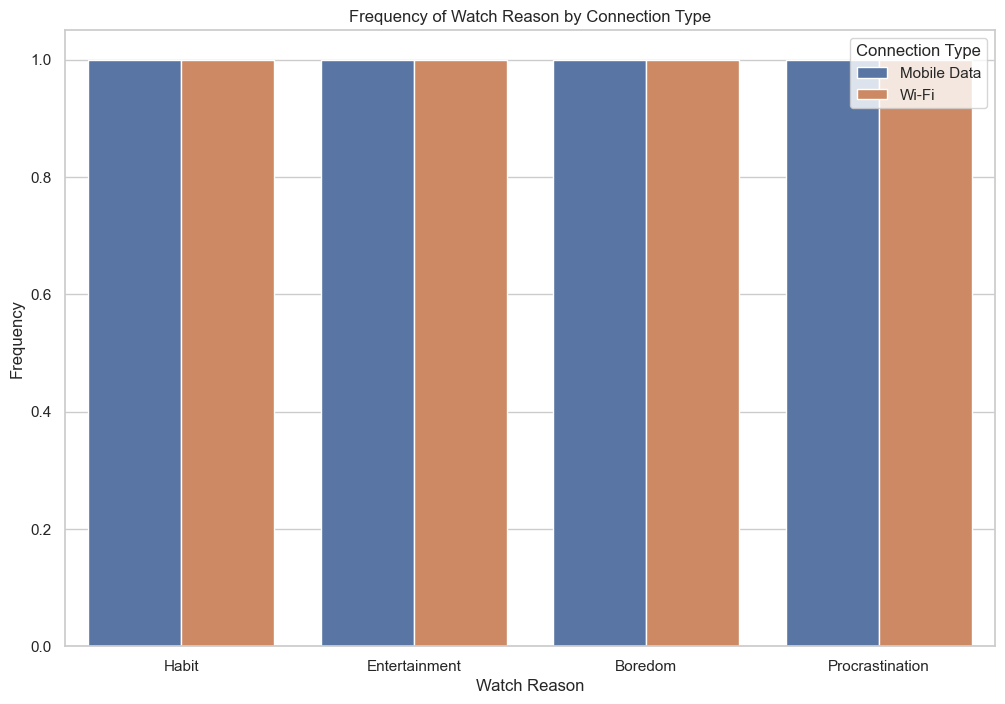

In [342]:
plt.figure(figsize=(12, 8))
sns.countplot(
    x='Watch_Reason', 
    hue='Connection_Type', 
    data=watch_reason_data
)
plt.title('Frequency of Watch Reason by Connection Type')
plt.xlabel('Watch Reason')
plt.ylabel('Frequency')
plt.legend(title='Connection Type')
plt.show()

## Conclusion
This analysis reveals crucial insights into how various factors influence social media usage, engagement, and user satisfaction. These findings can help individuals and content creators make informed decisions about their social media habits and strategies.

---

**George Zacharia**